/var/folders/qn/r236hk7d6g9d5m5jhyy4tqmc0000gn/T/ipykernel_53670/2361736426.py:111: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(female_error, male_error,


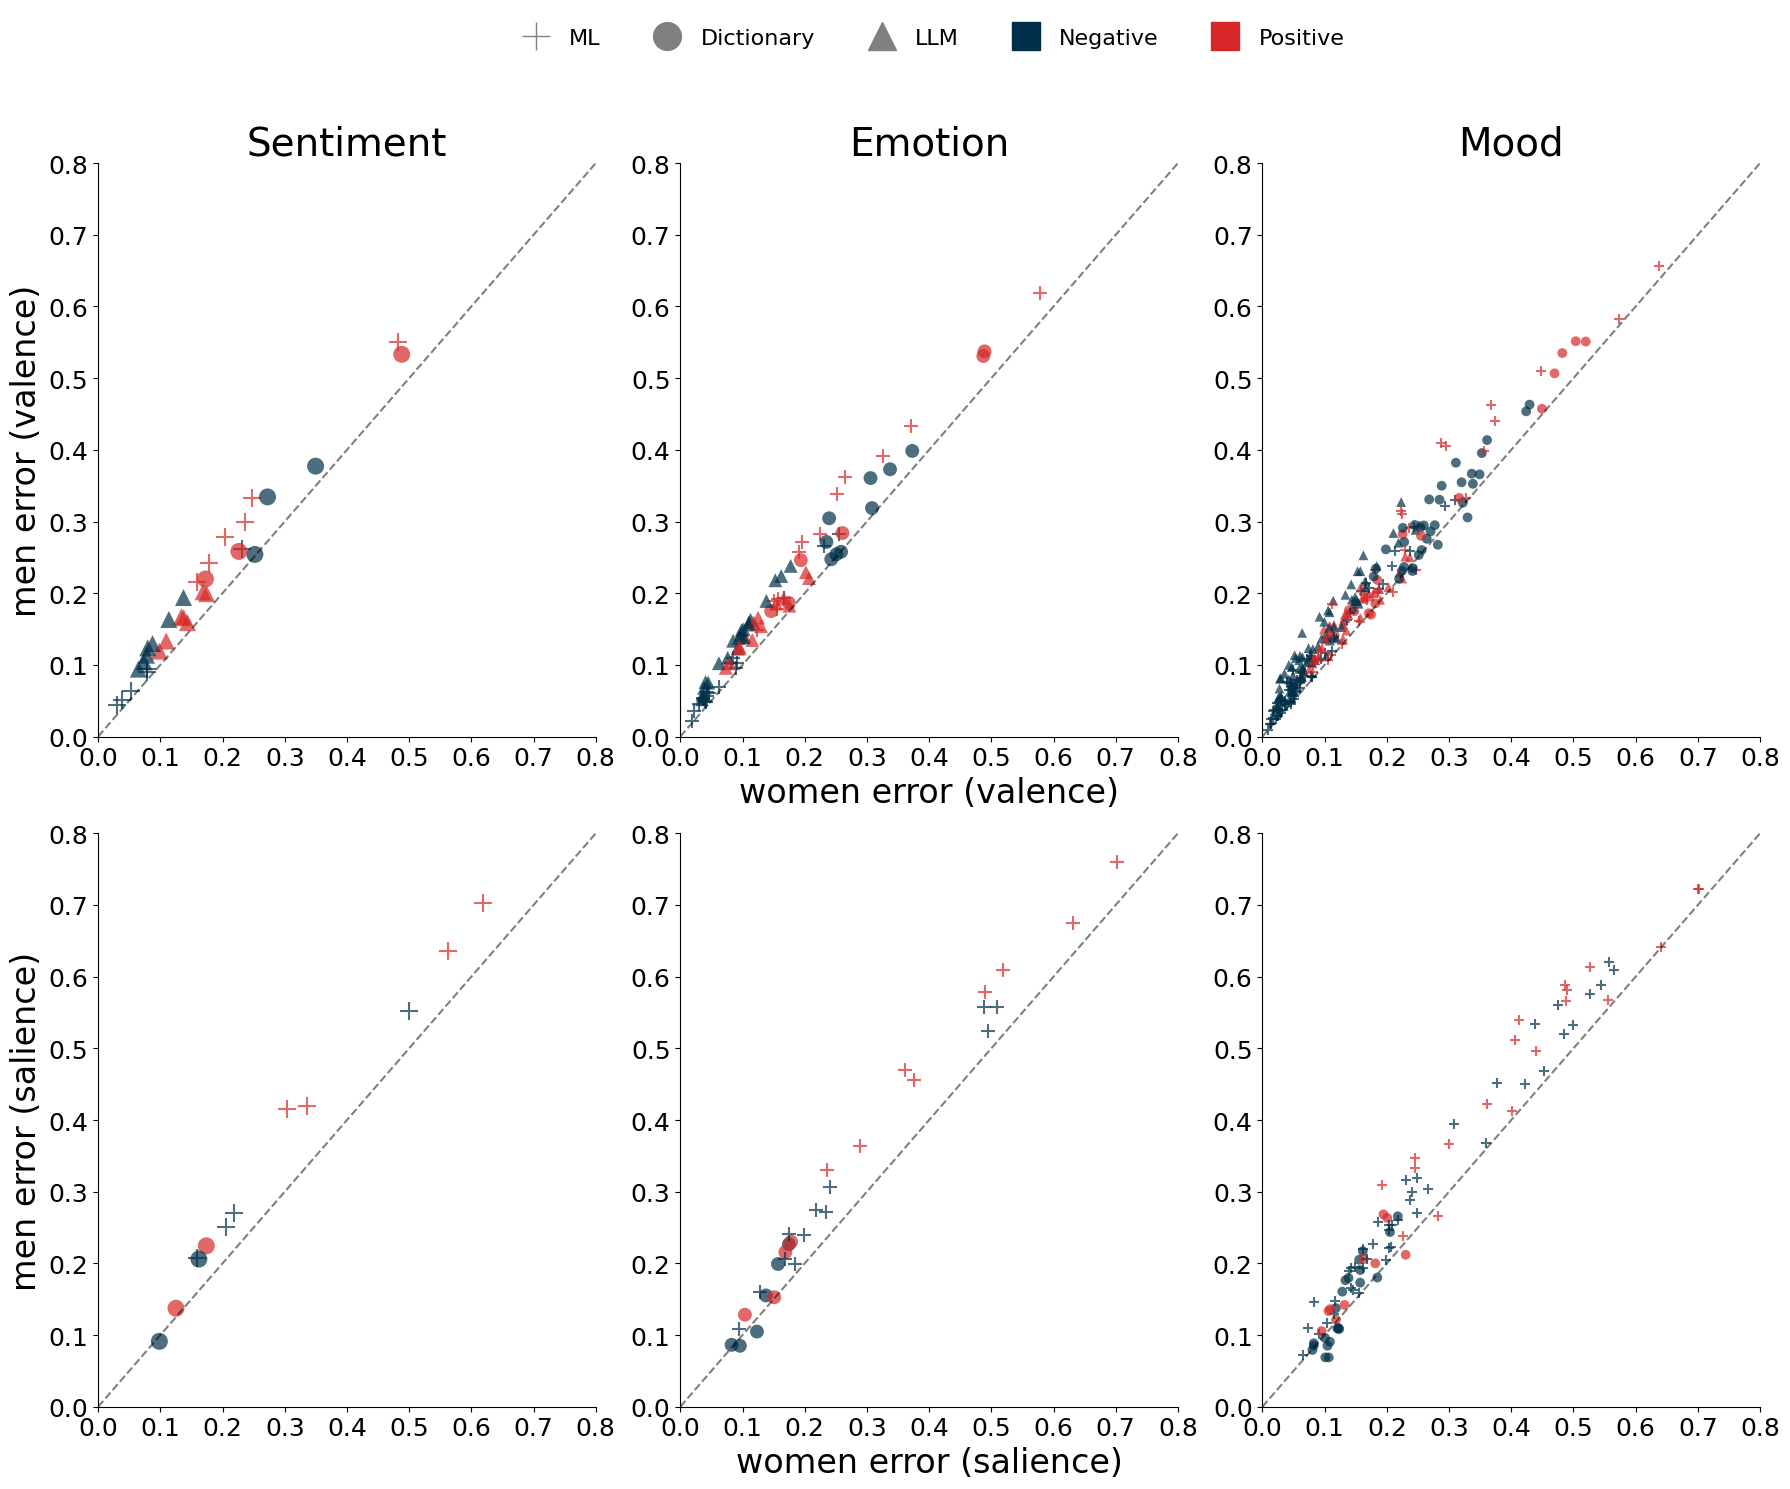

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Add proper NumPy import

# Colors
BLUE = '#003049'
RED = '#d62828'

# Define markers for different model types
MARKERS = {
    'ml': '+',
    'dictionary': 'o',
    'llm': '^'
}

# Customizable plot parameters
TITLE_SIZE = 28
LABEL_SIZE = 24
TICK_SIZE = 18
MARKER_ALPHA = 0.7
MARKER_SIZES = {
    'sentiment': 150,
    'emotion': 100,
    'mood': 50
}
LEGEND_MARKER_SIZE = 20

# Function to determine color based on category and value
def get_color(level, value):
    if level == 'sentiment':
        return BLUE if value == 'negative' else RED
    elif level == 'emotion':
        return BLUE if value in ['Sadness', 'Anger', 'Fear'] else RED
    else:  # mood
        negative_labels = ['Sad', 'Lonely', 'Angry', 'Annoyed', 'Frustrated', 
                           'Furious', 'Anxious', 'Stressed', 'Afraid', 
                           'Nervous', 'Worried']
        return BLUE if value in negative_labels else RED

# Function to create legend elements
def create_legend_elements():
    # Model type legend elements
    model_legend_elements = [
        plt.Line2D([0], [0], marker='+', color='gray', label='ML',
                  markerfacecolor='gray', markersize=LEGEND_MARKER_SIZE, linestyle='None'),
        plt.Line2D([0], [0], marker='o', color='gray', label='Dictionary',
                  markerfacecolor='gray', markersize=LEGEND_MARKER_SIZE, linestyle='None'),
        plt.Line2D([0], [0], marker='^', color='gray', label='LLM',
                  markerfacecolor='gray', markersize=LEGEND_MARKER_SIZE, linestyle='None')
    ]
    
    # Color legend elements
    color_legend_elements = [
        plt.Line2D([0], [0], marker='s', color=BLUE, label='Negative',
                  markerfacecolor=BLUE, markersize=LEGEND_MARKER_SIZE, linestyle='None'),
        plt.Line2D([0], [0], marker='s', color=RED, label='Positive',
                  markerfacecolor=RED, markersize=LEGEND_MARKER_SIZE, linestyle='None')
    ]
    
    return model_legend_elements + color_legend_elements

def filter_data(df, level, error_type):
    """
    Filter dataframe based on level and error_type
    Filter out zero error values for salience
    """
    # Basic filter for level and error_type
    filtered_df = df[(df['level'] == level) & (df['error_type'] == error_type)]
    
    # For salience, filter out zero error values
    if error_type == 'salience':
        filtered_df = filtered_df[filtered_df['error_value'] > 0]
    
    return filtered_df

def plot_data(ax, filtered_df, level):
    """
    Plot scatter points for a specific level dataset with markers based on model_type
    """
    # Get unique level values in this dataset
    level_values = filtered_df['level_value'].unique()
    
    # Get unique models
    models = filtered_df['model'].unique()
    
    # For each model and level value combination, plot male vs female errors
    for model in models:
        for level_value in level_values:
            data_subset = filtered_df[(filtered_df['model'] == model) & 
                                     (filtered_df['level_value'] == level_value)]
            
            # Check if we have both male and female data for this combination
            male_data = data_subset[data_subset['sex'] == 0]
            female_data = data_subset[data_subset['sex'] == 1]
            
            male_error = male_data['error_value'].values[0]
            female_error = female_data['error_value'].values[0]
            
            # Get model type to determine marker
            model_type = data_subset['model_type'].values[0]
            marker = MARKERS.get(model_type, 'o')
            
            # Get color based on level and level_value
            color = get_color(level, level_value)
            
            # Get marker size based on level
            marker_size = MARKER_SIZES.get(level, 80)
            
            # Plot the point with appropriate marker and color
            # Set edgecolors to 'none' to remove borders
            ax.scatter(female_error, male_error, 
                      color=color,
                      marker=marker,
                      s=marker_size,
                      alpha=MARKER_ALPHA,
                      edgecolors='none')

def setup_subplot(ax, title, show_xlabel, show_x_label_text, show_ylabel, error_type, show_title):
    """
    Setup the basic plot elements for a subplot
    """
    # Add reference line (x=y)
    ax.plot([0, 0.8], [0, 0.8], 'k--', alpha=0.5)
    
    # Add title only if requested
    if show_title:
        ax.set_title(title, fontsize=TITLE_SIZE)
    
    # Add labels only if requested
    if show_xlabel:
        if show_x_label_text:
            ax.set_xlabel(f'women error ({error_type})', fontsize=LABEL_SIZE)
        else:
            # Keep space for label but don't show text
            ax.set_xlabel('')
    else:
        ax.set_xlabel('')
        
    if show_ylabel:
        ax.set_ylabel(f'men error ({error_type})', fontsize=LABEL_SIZE)
    else:
        ax.set_ylabel('')
    
    # Set tick font size
    ax.tick_params(axis='both', which='major', labelsize=TICK_SIZE)
    
    # Remove top and right axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set x and y ticks to 0, 0.1, 0.2, ..., 0.8
    ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
    
    # Set xlim and ylim from 0 to 0.8
    ax.set_xlim(0, 0.8)
    ax.set_ylim(0, 0.8)

def generate_plots(df):
    """
    Generate 3x2 subplots for sentiment, emotion, and mood for both valence and salience
    """
    # Create figure with 3x2 subplots and space at the top for the legend
    fig = plt.figure(figsize=(18, 15))
    
    # Create a gridspec that leaves room for the legend at the top
    gs = fig.add_gridspec(3, 3, height_ratios=[0.1, 1, 1])
    
    # Create a subplot for the legend
    legend_ax = fig.add_subplot(gs[0, :])
    legend_ax.axis('off')  # Turn off axes for the legend subplot
    
    # Create the other subplots
    axes = []
    for i in range(2):
        row_axes = []
        for j in range(3):
            row_axes.append(fig.add_subplot(gs[i+1, j]))
        axes.append(row_axes)
    
    # Convert to 2D numpy array to match original layout
    axes = np.array(axes)  # Use np.array instead of plt.numpy
    
    # Levels to plot
    levels = ['sentiment', 'emotion', 'mood']
    titles = ['Sentiment', 'Emotion', 'Mood']
    error_types = ['valence', 'salience']
    
    # For each error type and level, create a subplot
    for row, error_type in enumerate(error_types):
        for col, (level, title) in enumerate(zip(levels, titles)):
            # Determine if this subplot should show labels
            show_xlabel = True  # Allow space for all x-labels
            show_x_label_text = (col == 1)  # Only show text for middle subplots
            show_ylabel = (col == 0)  # Only leftmost subplots shows y-labels
            show_title = (row == 0)   # Only top row shows titles
            
            # Setup the subplot
            setup_subplot(axes[row, col], title, show_xlabel, show_x_label_text, show_ylabel, error_type, show_title)
            
            # Filter data for this level and error type
            filtered_df = filter_data(df, level, error_type)
            
            # Plot the data
            plot_data(axes[row, col], filtered_df, level)
    
    # Add the legend to the top subplot
    legend_elements = create_legend_elements()
    legend_ax.legend(handles=legend_elements, loc='center', ncol=5, 
                    frameon=False, fontsize=16, handletextpad=0.5)
    
    # Adjust layout
    plt.tight_layout()

    return fig

# Read the data
df = pd.read_csv('data/errors.csv')

# Generate plots with specified parameters
fig = generate_plots(df)
plt.savefig('results.png', dpi = 600)